# Reproduce Badr Paper

## Import packages & data

In [1]:
import numpy as np
import scipy.signal as sig
import scipy.stats as st
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

In [2]:
rf = np.loadtxt("data_sahelprecip19012017.txt", skiprows=8,)
yr = rf[:, 0]

## Plot Summer (JAS) Rainfall Time Series

In [3]:
rfs = np.mean(rf[:, 7:10], axis=1) * 0.01

# slope, intersept, r_value, p_value, std_err = st.linregress(yr, rfs)
# trend = intersept + yr * slope
# notrend = rfs-trend

notrend = sig.detrend(rfs)
trend = rfs - notrend

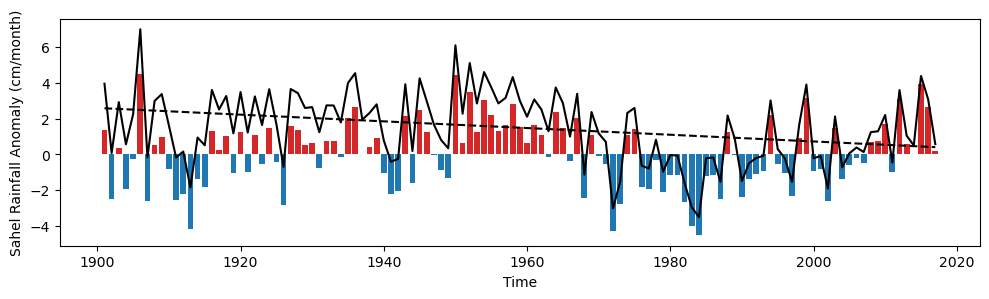

In [5]:
plt.figure(figsize=[10, 3], dpi=100)
plt.plot(yr, rfs, color="k")
plt.plot(yr, trend, "--", color="k")
plt.bar(yr, notrend, color=(np.where(notrend > 0, "C3", "C0")))
# plt.axhline(0)

plt.xlabel("Time")
plt.ylabel("Sahel Rainfall Anomaly (cm/month)")

plt.tight_layout()
plt.savefig('fig/summer_rain_ts', facecolor='w')

Plot shows similar trend like original. Yet absolute values differ probably due to different region coverage

## Plot Auto-Correlation of Summer Rainfall

In [5]:
def autocor(x, lag):
    y = np.zeros(lag + 1)
    for i in range(lag + 1):
        y[i] = st.pearsonr(x[i:], x[: len(x) - i])[0]
    return y

In [6]:
lag = 16
i = yr < 1951
ii = yr > 1950
fullauto = autocor(rfs, lag)
fullautod = autocor(notrend, lag)
earlyauto = autocor(rfs[i], lag)
earlyautod = autocor(notrend[i], lag)
lateauto = autocor(rfs[ii], lag)
lateautod = autocor(notrend[ii], lag)

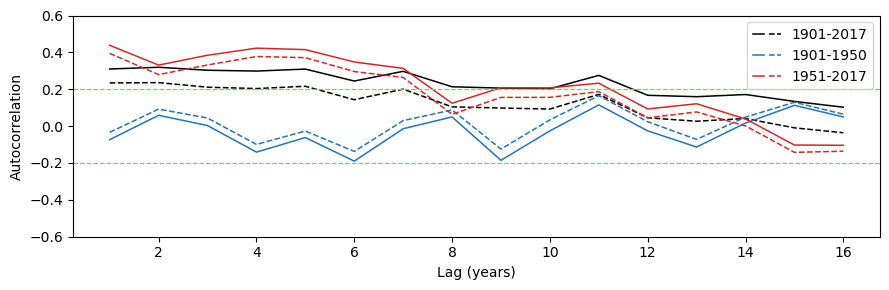

In [7]:
lw = 1.1
i = range(1, 17)
plt.figure(figsize=[9, 3], dpi=100)
p1, = plt.plot(i, fullauto[i], color="k", lw=lw)
p2, = plt.plot(i, fullautod[i], color="k", lw=lw, ls="--")
p3, = plt.plot(i, earlyauto[i], color="C00", lw=lw)
p4, = plt.plot(i, earlyautod[i], color="C00", lw=lw, ls="--")
p5, = plt.plot(i, lateauto[i], color="C03", lw=lw)
p6, = plt.plot(i, lateautod[i], color="C03", lw=lw, ls="--")

plt.axhline(0.2, color='#65db60', lw= 0.9, ls='--')
plt.axhline(-0.2, color='#65db60', lw= 0.9, ls='--')

plt.xlabel('Lag (years)')
plt.ylabel('Autocorrelation')
plt.ylim(-0.6, 0.6)
# plt.legend([(p1, p2)],['1900-2017'])
l = plt.legend([(p1, p2),(p3, p4),(p5, p6)], [('1901-2017'),('1901-1950'),('1951-2017')], numpoints=0.8,
               handler_map={tuple: HandlerTuple(ndivide=None)})

plt.tight_layout()
plt.savefig('autocor.png', facecolor='w', edgecolor='w')